# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     920.4
Date:                Wed, 03 May 2023   Prob (F-statistic):           4.67e-41
Time:                        15:50:07   Log-Likelihood:                 1.3405
No. Observations:                  50   AIC:                             5.319
Df Residuals:                      46   BIC:                             12.97
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9790      0.084     59.479      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.50677922  4.99533703  5.44215565  5.81761295  6.1027773   6.29251793
  6.39634792  6.43686124  6.44602061  6.45990613  6.51278739  6.63149312
  6.83100327  7.11198786  7.46069689  7.85121943  8.24974073  8.62009786
  8.92972118  9.15498547  9.28509145  9.32384008  9.2890081   9.20942732
  9.12024768  9.05716217  9.0505426   9.12044959  9.27333667  9.50098999
  9.78187781 10.08468812 10.37347312 10.61355532 10.77722498 10.84829273
 10.82474943 10.71909628 10.55629088 10.36964683 10.19536031 10.06656324
 10.00787972 10.03138043 10.1345994  10.30093919 10.50239778 10.70416925
 10.87036227 10.96989697]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.9710596  10.83012398 10.56840544 10.23447896  9.89228627  9.60548075
  9.42184278  9.36158153  9.41238695  9.5324438 ]


## Plot comparison

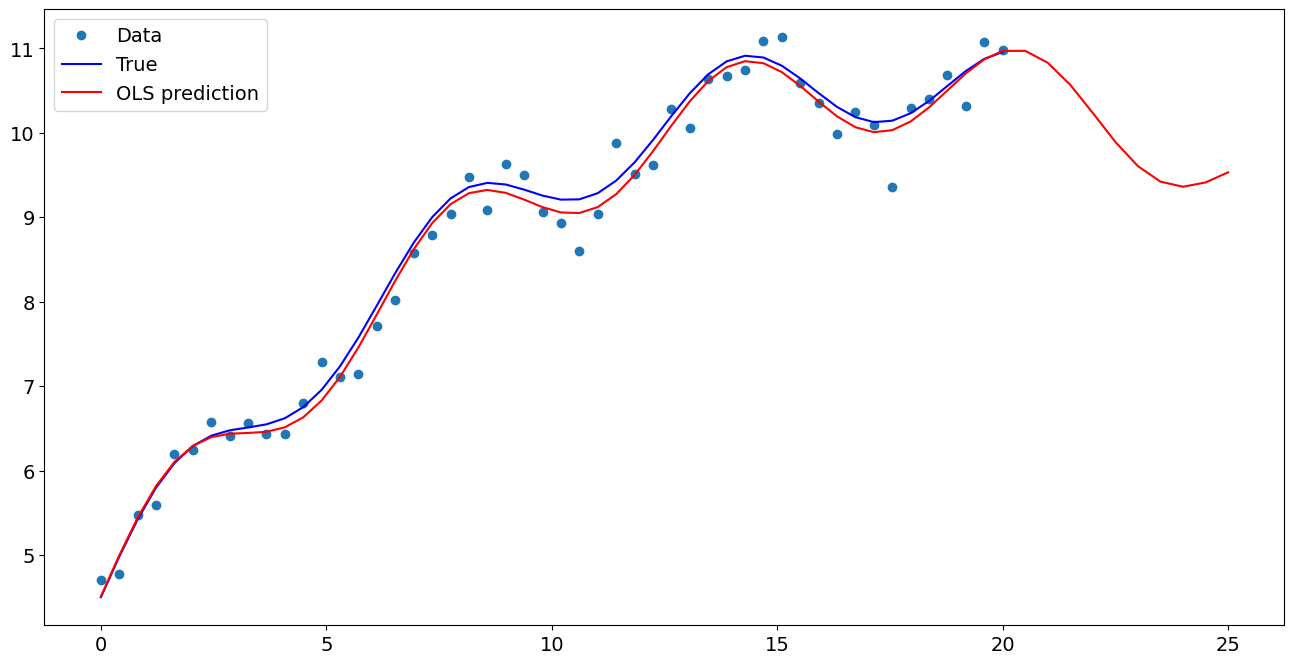

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           4.978984
x1                  0.487227
np.sin(x1)          0.543534
I((x1 - 5) ** 2)   -0.018888
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.971060
1    10.830124
2    10.568405
3    10.234479
4     9.892286
5     9.605481
6     9.421843
7     9.361582
8     9.412387
9     9.532444
dtype: float64